In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found

Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table

measurement = Base.classes.measurement
station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB

session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.

engine.execute('SELECT max(date) FROM measurement').fetchall()

[('2017-08-23',)]

[('2010-01-01',)]

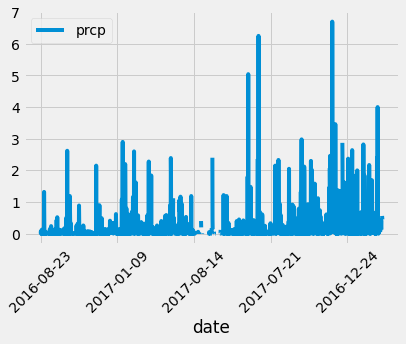

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

precipitation_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-23').filter(measurement.date <= '2017-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date colum

Predf = pd.DataFrame(precipitation_data)

# Sort the dataframe by date

Predf = Predf.set_index('date')


# Use Pandas Plotting with Matplotlib to plot the data

Predf.plot(rot=45)
plt.savefig('Precipitation graph.png')
plt.show()

# According to the graph; it seems that the precipitaiton has a linear-ish groth

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Predf.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset

station_total = session.query(station.id).count()

station_total

# So we can see that there are 9 stations in the dataset

9

In [41]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(measurement.station, func.count(measurement.station)).filter(measurement.station == station.station).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active_stations

# So the first station showed it's the most active one

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [47]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_actives = 'USC00519281'
result = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_actives).all()

lowest_temp = result[0][0]
highest_temp =result[0][1]
average_temp = result[0][2]

print(f'The lowest temperature is {lowest_temp}')
print(f'The highest temperature is {highest_temp}')
print(f'The average temperature is {average_temp}')

The lowest temperature is 54.0
The highest temperature is 85.0
The average temperature is 71.66378066378067


<AxesSubplot:ylabel='Frequency'>

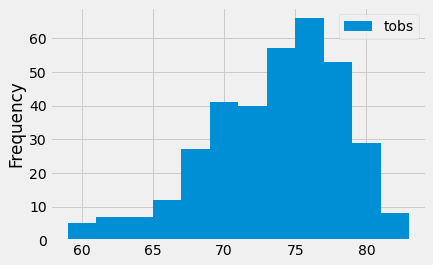

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

active_id = active_stations[0][0]

query_months = session.query(measurement.date, measurement.tobs).filter(measurement.date >= '2016-08-23').filter(measurement.date <= '2017-08-23').filter(measurement.station == active_id).all()

temperature1_df = pd.DataFrame(query_months)
temperature1_df = temperature1_df.set_index('date').sort_index(ascending=True)

temperature1_df.plot.hist(bins=12)

# Close session

In [ ]:
# Close Session
session.close()